In [5]:
import scanpy as sc
import pandas as pd
import pickle
import numpy as np
import time
import graph_tool.all as gt
%matplotlib inline
%pylab

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import anndata
adata= sc.read('pbmc/adata_sc_pbmc.h5ad')
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
df_significativo= pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20) #### df con i 20 geni significativi per gruppo
g = pickle.load( open( "pbmc/pbmc_g.pkl", "rb" ))

In [3]:
state= gt.minimize_nested_blockmodel_dl(g,deg_corr=False)

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
0,1081,0,1,21,0,0,0,0
1,0,0,338,0,0,0,0,0
2,0,479,0,0,0,146,0,0
3,32,0,0,284,163,0,0,0
4,30,7,2,1,0,4,36,13


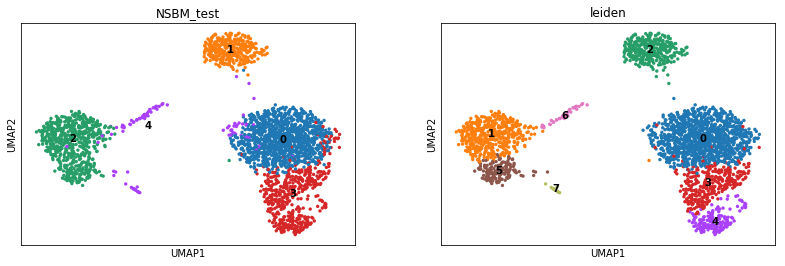

In [11]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

In [6]:
state1=state.copy()

In [10]:
bs = state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
stateM = state.copy(bs=bs, sampling=True)
stateM.multiflip_mcmc_sweep(niter=10000)

(-135.86389892860683, 19847278, 146243)

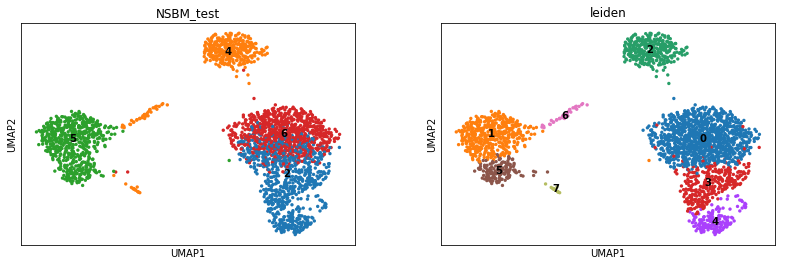

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
2,330,0,0,298,163,0,0,0
4,0,0,340,0,0,1,36,13
5,0,486,0,0,0,147,0,0
6,813,0,1,8,0,2,0,0


In [19]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(stateM.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

In [13]:
bs = stateM.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
a=time.time()
estateM = stateM.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(estateM,wait=1000,nbreaks=2,max_niter=100000,epsilon=0.001,gibbs=False,multiflip=True,force_niter=None, mcmc_args=dict(niter=10))
b=time.time()
print(b-a)
estateM

422.3820974826813


<NestedBlockState object, with base <BlockState object with 109 blocks (107 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f1af4de9b50>, at 0x7f1abec5d650>, and 10 levels of sizes [(2638, 107), (107, 22), (22, 9), (9, 5), (5, 4), (4, 3), (3, 2), (2, 1), (1, 1), (1, 1)] at 0x7f1abec5d610>

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
0,43,0,0,224,0,0,0,0
1,26,1,2,0,0,2,0,0
3,1074,0,0,16,0,0,0,0
4,0,0,0,66,163,0,0,0
5,0,0,0,0,0,16,0,13
7,0,464,0,0,0,10,0,0
8,0,4,0,0,0,122,0,0
10,0,0,339,0,0,0,6,0
16,0,17,0,0,0,0,30,0


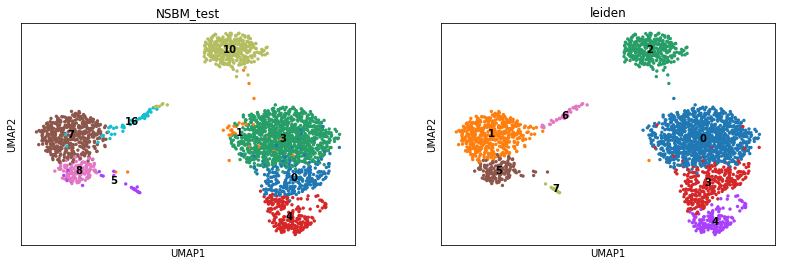

In [15]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estateM.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

In [16]:
bs = stateM.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
a=time.time()
estateM = stateM.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(estateM,wait=1000,nbreaks=2,max_niter=100000,epsilon=0.001,gibbs=False,multiflip=True,force_niter=None, mcmc_args=dict(niter=10))
b=time.time()
print(b-a)
estateM

384.7059416770935


<NestedBlockState object, with base <BlockState object with 111 blocks (107 nonempty), for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7f1af4de9b50>, at 0x7f1abec00950>, and 10 levels of sizes [(2638, 107), (107, 24), (24, 10), (10, 6), (6, 4), (4, 3), (3, 2), (2, 2), (2, 1), (1, 1)] at 0x7f1abec00290>

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
2,1085,0,0,19,0,1,0,0
3,0,0,0,64,163,0,0,0
5,28,0,17,0,0,1,0,0
6,0,0,324,0,0,0,6,0
7,0,0,0,0,0,0,26,0
8,0,1,0,0,0,52,0,13
10,0,22,0,0,0,93,0,0
11,30,0,0,223,0,0,0,0
12,0,443,0,0,0,3,0,0


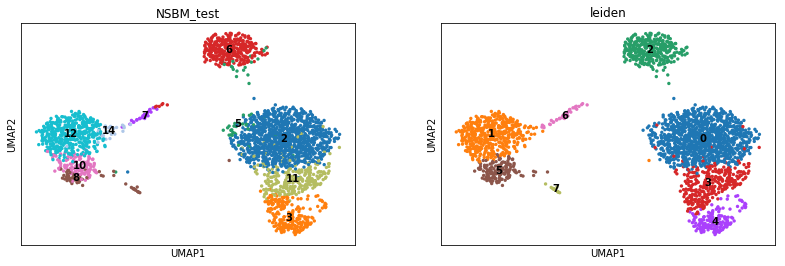

In [17]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estateM.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

# deg corr true

In [21]:
state= gt.minimize_nested_blockmodel_dl(g)
state

<NestedBlockState object, with base <BlockState object with 45 blocks (45 nonempty), degree-corrected, for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7fc662747750>, at 0x7fc63c24d390>, and 5 levels of sizes [(2638, 45), (45, 10), (10, 4), (4, 2), (2, 1)] at 0x7fc63c2639d0>

In [22]:
state2=state.copy()

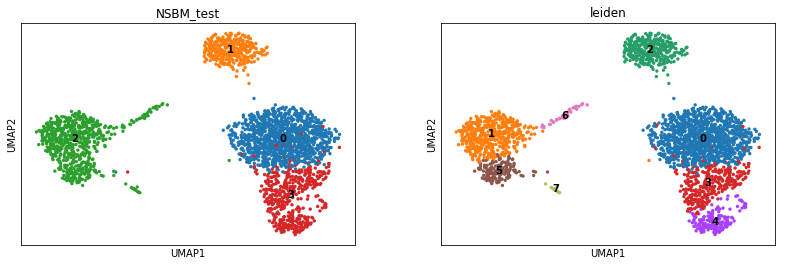

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
0,1123,0,0,21,0,1,0,0
1,0,0,341,0,0,0,0,0
2,0,486,0,0,0,148,36,13
3,20,0,0,285,163,1,0,0


In [26]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(state.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

In [27]:
bs = state.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))
stateM = state.copy(bs=bs, sampling=True)
stateM.multiflip_mcmc_sweep(niter=10000)
stateM

<NestedBlockState object, with base <BlockState object with 63 blocks (60 nonempty), degree-corrected, for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7fc662747750>, at 0x7fc640077bd0>, and 10 levels of sizes [(2638, 60), (60, 11), (11, 5), (5, 3), (3, 2), (2, 1), (1, 1), (1, 1), (1, 1), (1, 1)] at 0x7fc6400774d0>

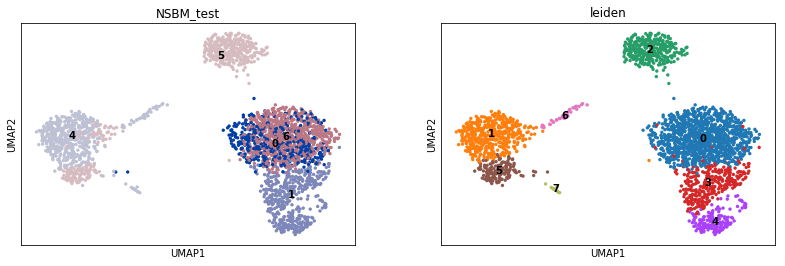

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
0,419,0,0,7,0,2,0,0
1,17,0,0,279,163,0,0,0
4,0,428,0,0,0,45,36,13
5,0,58,341,0,0,103,0,0
6,707,0,0,20,0,0,0,0


In [30]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(stateM.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)

In [31]:
bs = stateM.get_bs()                   
bs += [np.zeros(1)] * (10 - len(bs))

estateM = stateM.copy(bs=bs, sampling=True)
gt.mcmc_equilibrate(estateM,wait=1000,nbreaks=2,max_niter=1000000,epsilon=0.001,multiflip=True,force_niter=None, mcmc_args=dict(niter=10))
estateM

<NestedBlockState object, with base <BlockState object with 78 blocks (75 nonempty), degree-corrected, for graph <Graph object, undirected, with 2638 vertices and 20976 edges at 0x7fc662747750>, at 0x7fc63c2b9310>, and 10 levels of sizes [(2638, 75), (75, 22), (22, 12), (12, 6), (6, 4), (4, 3), (3, 2), (2, 2), (2, 1), (1, 1)] at 0x7fc63eda5e90>

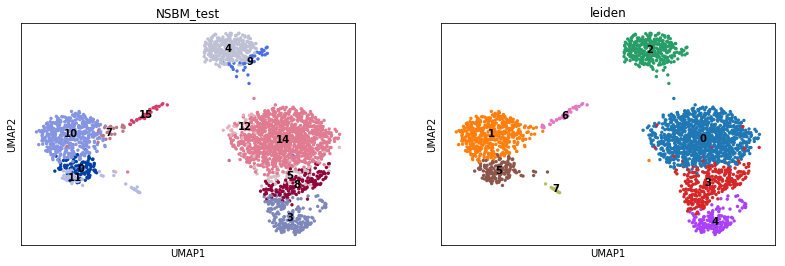

leiden,0,1,2,3,4,5,6,7
NSBM_test,,,,,,,,
0,0,6,0,0,0,95,0,0
3,0,0,0,62,161,0,0,0
4,0,0,302,0,0,0,0,0
5,9,0,0,68,0,0,0,0
7,0,23,0,0,0,0,4,0
8,2,0,0,148,2,0,0,0
9,1,0,39,0,0,0,0,0
10,0,457,0,0,0,5,0,0
11,0,0,0,0,0,48,0,13


In [32]:
adata.obs.loc[:, 'NSBM_test'] = pd.Categorical(list(estateM.project_level(2).get_blocks()))
sc.pl.umap(adata, color=["NSBM_test", 'leiden'], legend_loc='on data')
pd.crosstab(adata.obs.NSBM_test, adata.obs.leiden)